In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw12.ipynb")

# Social analysis
We've discussed some elements of social analysis in class. Let's play with some of those concepts using the "20 Newsgroups" dataset. 

First, let's load this dataset in a new way, not eliminating the headers `From:` and `Subject:`. 

In [2]:
from sklearn.datasets import fetch_20newsgroups
cats = ['rec.autos']  # only one newsgroup
newsgroups = fetch_20newsgroups(categories=cats, remove=('footers', 'quotes',))  # leave headers for analysis
newsgroups.data[0]

'From: qazi@csd4.csd.uwm.edu (Aamir Hafeez Qazi)\nSubject: Re: Difference between Lexus 300 series?\nArticle-I.D.: uwm.1pr5f8INN4om\nReply-To: qazi@csd4.csd.uwm.edu\nOrganization: University of Wisconsin - Milwaukee\nLines: 18\nNNTP-Posting-Host: 129.89.7.4\nOriginator: qazi@csd4.csd.uwm.edu\n\nFrom article <1993Apr5.200048.23421@ucsu.Colorado.EDU>, by lorenzo@rintintin.Colorado.EDU (Eric Lorenzo):\n\n--Let me put it like this.  The only similarity between the three models\n  is the "300", or 3-liter engine displacement.  Actually, the SC300 (the\n  coupe) and the GS300 (the funky-looking new sedan) share the same 3.0\n  liter inline-six, and the ES300 (popular small sedan) uses 3.0 V6 shared\n  with the Camry.  The SC300 is a luxury/sports coupe, the GS300 is the new\n  luxury sedan, and the ES300 is the base executive sedan.  All three look\n  completely different.\n\n--Aamir Qazi\n-- '

Now, let's parse this into a list of Python dictionaries, including the `From:` and `Subject:` information for each post. 

In [3]:
# Parse the newsgroup headers to determine who is writing and the subject of writing. 
parsed = []
froms = {}
subjects = {}
for d in newsgroups.data:
    stuff = d.split('\n')
    header = True
    # Parse out header lines, saving only the significant lines "From:" and "Subject:"
    lines = []
    fromline = None 
    subject = None
    for s in stuff:
        if header: 
            if s.startswith('From: '):  # record identity of poster.
                fromline = s[6:]
                try:
                    ind = fromline.index('(') 
                    fromline = fromline[:ind-1]
                except: 
                    pass
            elif s.startswith('Subject: '):  # record subject of post.
                subject = s[9:]
                if subject.startswith('Re: '):  # remove Re: for purposes of analysis
                    subject = subject[4:]
            elif s != '':
                pass
            else:  # header ends with a blank line.
                header = False
        else: 
            if len(s) <= 90: 
                lines.append(s)

    if fromline is not None and subject is not None:  # skip blank headers
        parsed.append({'from': fromline, 'subject': subject, 'lines': lines})
        parsed[0]

<!-- BEGIN QUESTION -->

*Question 1:* Convert the above input `parsed` into a set of connectivity pairs `pairs` according to the following rubric: 
* The nodes are people's email addresses (the 'from' field of the data above). 
* There is an edge between person X and person Y whenever X and Y have written on the same `subject`. 
* In any pair, the first element is alphabetically less than the second element (to eliminate duplicates). 

*Hint:* You will have to construct a pair list yourself from the above data, by matching subjects between posts. Any two posts with the same subject generates one pair. 

In [4]:
people = set()
pairs = set()
for p1 in parsed:
    f1 = p1['from']
    for p2 in parsed:
        f2 = p2['from']
        if f1 != f2:
            if p1['subject'] == p2['subject']:
                people.add(f1)
                people.add(f2)
                if f1<f2:
                    pairs.add((f1,f2))
                else:
                    pairs.add((f2,f1))

In [5]:
grader.check("q1")

q1 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 2:* Read the pairs from above into a graph named `social_graph`.

In [6]:
import networkx as nx
social_graph = nx.Graph()
    
nodes = list(people)
edges = list(pairs)

social_graph.add_nodes_from(nodes)
social_graph.add_edges_from(edges)

In [7]:
grader.check("q2")

q2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 3:* Visualize the graph `social_graph` via the spring model. Don't bother labeling nodes as yet. 

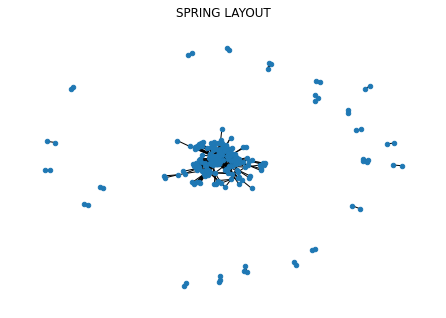

In [8]:
import matplotlib.pyplot as plt
spring_pos = nx.drawing.layout.spring_layout(social_graph)
nx.drawing.nx_pylab.draw(social_graph, pos=spring_pos, node_size = 20)
plt.title("SPRING LAYOUT")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 4:* Let's simplify the depiction above. First, let's separate the graph into connected components and eliminate nodes that are isolated from the core cluster. Then depict the remaining graph using spring layout. Call the new subgraph `core_graph`. 

*Hints:* use `nx.connected_components(G)` and `social_graph.subgraph(...)`. 

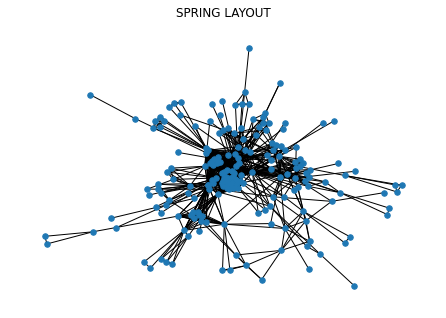

In [9]:
components = sorted(nx.connected_components(social_graph), key=len, reverse=True)
remaining = components[0:1]
core_graph = [social_graph.subgraph(r).copy() for r in remaining][0]

nx.drawing.nx_pylab.draw(core_graph, pos=spring_pos, node_size = 30)
plt.title("SPRING LAYOUT")
plt.show()

In [10]:
grader.check("q4")

q4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 5:* Which person influences the most people? Print this person's ID, and then draw a version of the core graph where only the edges for this person are shown. Make the nodes nearly transparent (`alpha=0.1`) so that we can see the edges. 

*Hints:* the person who influences the most people corresponds to the node with maximum "degree". Use `Graph.degree(node)` and the `edgelist` parameter to `Graph.draw_networkx_edges`

id of most influential person: cka52397@uxa.cso.uiuc.edu


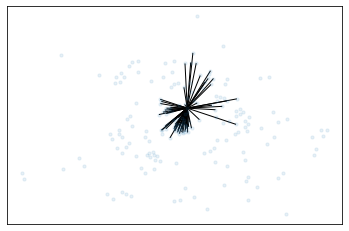

In [11]:
degree = []
list_people = list(remaining[0])
for n in list(list_people):
    degree.append(core_graph.degree(n))

maxDeg = max(degree)
index = degree.index(maxDeg)
person = list_people[index]

#person = cka52397@uxa.cso.uiuc.edu
#max degree = 71
edge_list = []
for p in pairs:
    if p[0] == person or p[1] == person:
        edge_list.append(p)
        
nx.draw_networkx_edges(core_graph, pos=spring_pos, edgelist = edge_list)
nx.draw_networkx_nodes(core_graph, pos=spring_pos, alpha = 0.1, node_size = 10)
print("id of most influential person: " + person)

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [12]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

You are not done until you upload the exported zipfile to GradeScope.

In [13]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)